In [15]:
import numpy as np
from scipy.spatial.distance import euclidean
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

class UMAP:
    def __init__(self, n_neighbors=15, n_components=2, min_dist=0.1, learning_rate=1.0, n_epochs=500):
        self.n_neighbors = n_neighbors
        self.n_components = n_components
        self.min_dist = min_dist
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs

    def fit_transform(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # Initialize low-dimensional embeddings
        self.embedding = np.random.normal(size=(self.n_samples, self.n_components), scale=0.01)

        # Compute pairwise distances in the high-dimensional space
        distances = self.calculate_distances(X)

        # Compute fuzzy simplicial set
        self.fuzzy_simplicial_set(distances)

        # Optimize low-dimensional embeddings
        self.optimize_embeddings()

        return self.embedding

    def calculate_distances(self, X):
        distances = np.zeros((self.n_samples, self.n_samples))
        for i in range(self.n_samples):
            for j in range(i + 1, self.n_samples):
                distances[i, j] = euclidean(X[i], X[j])
                distances[j, i] = distances[i, j]
        return distances

    def fuzzy_simplicial_set(self, distances):
        # Compute fuzzy simplicial set
        knn_indices = np.argsort(distances)[:, 1 : self.n_neighbors + 1]
        knn_dists = np.sort(distances)[:, 1 : self.n_neighbors + 1]

        sigmas, rhos = self.find_ab_params(knn_dists)

        rows = np.repeat(np.arange(self.n_samples), self.n_neighbors)
        cols = knn_indices.flatten()
        vals = self.membership_strength(knn_dists, sigmas, rhos)

        self.rows = rows
        self.cols = cols
        self.vals = vals

    def find_ab_params(self, knn_dists):
        # Placeholder function, you may need to fine-tune these parameters
        a = 1.577
        b = 0.8951
        return a, b

    def membership_strength(self, distances, sigmas, rhos):
        result = np.exp(-distances / (sigmas + 1e-8))
        result *= 1.0 / (rhos + 1e-8)
        return result.flatten()

    def optimize_embeddings(self):
        for epoch in range(self.n_epochs):
            # Stochastic Gradient Descent
            gradient = self.compute_gradient()
            self.embedding -= self.learning_rate * gradient

    def compute_gradient(self):
        gradient = np.zeros_like(self.embedding)

        for i in range(self.n_samples):
            neighbors = self.cols[self.rows == i]
            edge_weights = self.vals[self.rows == i]

            for neighbor, weight in zip(neighbors, edge_weights):
                diff = self.embedding[i] - self.embedding[neighbor]
                gradient[i] += 2 * weight * diff / (1e-8 + np.linalg.norm(diff))

        return gradient

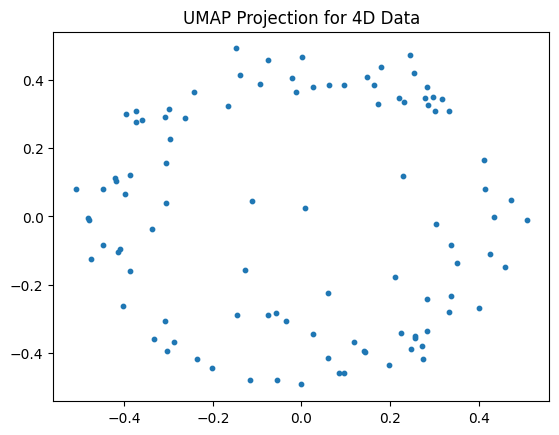

In [16]:
np.random.seed(42)
data_4d = np.random.rand(100, 4)

# Apply UMAP
umap = UMAP(n_neighbors=10, n_components=2, min_dist=0.1, learning_rate=0.1, n_epochs=200)
embedding = umap.fit_transform(data_4d)

# Plot the results
plt.scatter(embedding[:, 0], embedding[:, 1], s=10)
plt.title("UMAP Projection for 4D Data")
plt.show()

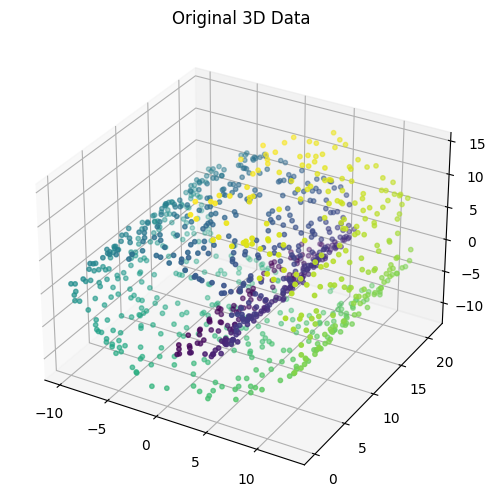

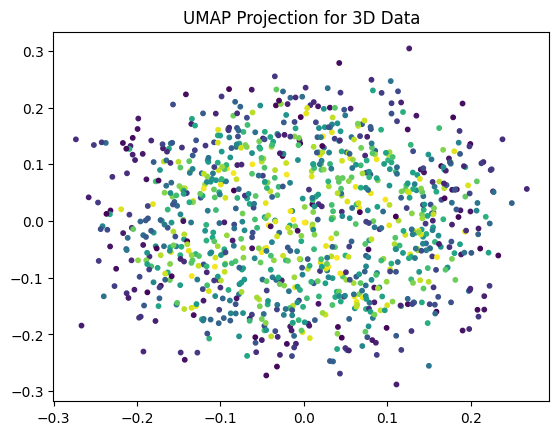

In [17]:
import numpy as np
from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Generate 3D swiss roll data
np.random.seed(42)
data_3d, color = make_swiss_roll(n_samples=1000, noise=0.2)

# Plot the 3D data
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=color, cmap='viridis', s=10)
ax.set_title("Original 3D Data")
plt.show()

# Apply UMAP to project 3D data into 2D
umap = UMAP(n_neighbors=10, n_components=2, min_dist=0.1, learning_rate=0.1, n_epochs=200)
embedding_2d = umap.fit_transform(data_3d)

# Plot the 2D embedding
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=color, cmap='viridis', s=10)
plt.title("UMAP Projection for 3D Data")
plt.show()